# 가상환경 설정 및 설치
---
- conda 명령어를 사용해서 새로운 가상환경을 설치한다.
- 새로운 가상환경 설치
    conda create --name 'python_stock'
- 가상환경 사용
    ```conda activate python_stock
        (base) ~/python_stock_data_analysis % conda activate python_stock
        (python_stock) ~/python_stock_data_analysis % 
    ```
    - base -> python_stock 으로 변경된 것을 확인
    
- pip을 이용한 패키지 설치
    - 본 책에서 사용하는 실습용 패키지를 한번에 설치하도록 [깃허브 홈페이지](www.github.com/investar/StockAnalysisInPython) 으로 이동해서 설치한다. 
    - pip install -r requirements.txt 명렁어를 통해서 필요한 라이브러리를 모두 설치한다. 
    - 판다스만 설치시에 오류가 생겨서 pip install pandas로 따로 설치해주었다.

# 파이썬 기본 문법들
---

- 기존에 알고 있던 내용들은 제외하고 조금이라도 헷갈리는 개념들만 모아서 정리한다. 


In [5]:
# 예외처리
# 일반적으로 프로그램 수행 도중에 예외가 발생하면 예외 메시지를 표시하고 자동으로 종료된다. 
# 종료되면 안 되는 프로그램의 경우 예외처리로 종료를 막을 수 있다. 
# 아래와 같이 Exception클래스를 문자열로 출력하면 예외명을 보고 디버깅할 때 도움이 된다. 
try:
    1/0
except Exception as e:
    print("Exception occured :", str(e))

Exception occured : division by zero


In [12]:
#문자열 포맷 출력
x = [1,3,2,4,0]

# 1. %기호 방식
for num in x:
    print('%d : %d' %(num, x[num]), end = ' ')
print()    

# 2. {}기호 방식
for num in x:
    print('{} : {}'.format(num, x[num]), end  =' ')
print()    

# 3. f-strings 방식
for num in x:
    print(f'{num} : {x[num]}', end = ' ')
    

1 : 3 3 : 4 2 : 2 4 : 0 0 : 1 
1 : 3 3 : 4 2 : 2 4 : 0 0 : 1 
1 : 3 3 : 4 2 : 2 4 : 0 0 : 1 

In [15]:
#타임잇으로 성능 측정하기
#timeit(테스트 구문, setup = 테스트 준비 구문, number=테스트 반복 횟수)
import timeit
iteration_test = '''
for i in itr:
    pass
'''
print(timeit.timeit(iteration_test, setup = 'itr = list(range(10000))', number = 1000))
print(timeit.timeit(iteration_test, setup = 'itr = tuple(range(10000))', number = 1000))
print(timeit.timeit(iteration_test, setup = 'itr = set(range(10000))', number = 1000))

0.0901010130000941
0.07443769000019529
0.09664344399971014


In [21]:
import timeit
search_test = '''
import random
x = random.randint(0,len(itr)-1)
if x in itr:
    pass
'''
print(timeit.timeit(search_test, setup = 'itr = list(range(10000))', number = 1000))
print(timeit.timeit(search_test, setup = 'itr = tuple(range(10000))', number = 1000))
print(timeit.timeit(search_test, setup = 'itr = set(range(10000))', number = 1000))

0.0559175630005484
0.046166504999746394
0.0010548440004640725


# 파일 처리 및 외부 라이브러리 활용
---
- 리퀘스트로 인터넷에서 이미지 파일 가져오기
- 파일 객체를 이용해서 일정 크기로 읽고 쓰면서 파일 복사하기
- SHA-256 해시값으로 두 파일의 동일 여부 확인하기
- matplotlib으로 이미지를 가공해서 비교하기

In [23]:
# request 패키지에서 제공하는 Get함수와 post함수를 사용하면 자유자재로 HTTP패킷을 주고받을 수 있다. 
# 아래처럼 호출해서 간단하게 이미지 파일을 get할 수 있다. 
import requests
url = 'https://ssl.nexon.com/s2/game/fo4/obt/banner/main/0111_23toty/banner_big_20230111_23TOTY_image.jpg'
r = requests.get(url, stream =True).raw

In [24]:
# 이미지 처리 패키지인 필로를 사용한다. 
# open으로 열고, show로 사진을 보여주고 save로 저장해준다. 
from PIL import Image
img = Image.open(r)
img.show()
img.save('src.png')

In [26]:
#JPG, RGB, 2000x640 등의 정보들을 알 수 있다. 
print(img.get_format_mimetype)

<bound method ImageFile.get_format_mimetype of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x640 at 0x7FA0E8DA3730>>


In [28]:
#"with ~ as 객체"를 사용하면 close()를 할 필요가 없기 떄문에 편하다.
#src 파일을 열어서 sf 파일 객체를 생성하고, dst파일을 쓰기 모드로 열어서 df 파일 객체를 생성한다. 
#BUF_SIZE는 한번에 읽는 데이터의 크기이다. 
BUF_SIZE = 1024
with open('src.png','rb') as sf, open('dst.png', 'wb') as df:
    while True:
        data = sf.read(BUF_SIZE)
        if not data:
            break
        df.write(data)

In [31]:
#sha-2는 미국 국가안보국이 설계한 해시 함수들의 집합으로 SHA-256은 256비트, 즉 64바이트의 해시값을 반환한다. 
#두개의 해시값이 같은 것을 확인할 수 있다. 
import hashlib

sha_src = hashlib.sha256()
sha_dst = hashlib.sha256()

with open('src.png','rb') as sf, open('dst.png','rb') as df:
    sha_src.update(sf.read())
    sha_dst.update(df.read())
    
print("src.png's hash : {}".format(sha_src.hexdigest()))
print("dst.png's hash : {}".format(sha_dst.hexdigest()))

src.png's hash : f26d5c0ff8f175ff323a6552988fd3a37c861bfc9d8f35d65eb3c140aa0178a3
dst.png's hash : f26d5c0ff8f175ff323a6552988fd3a37c861bfc9d8f35d65eb3c140aa0178a3


In [32]:
#맷플롯립으로 이미지를 가공한다. 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dst_img = mpimg.imread('dst.png')

In [35]:
#pseudo 이미지는 파일을 슬라이싱해서 구했음으로 파일의 차원이 2차원이다. 
# print(dst_img)
pseudo_img = dst_img[:, :, 0]
# print(pseudo_img)

[[0.41960785 0.39607844 0.3647059  ... 0.04705882 0.04705882 0.04313726]
 [0.42352942 0.41568628 0.39215687 ... 0.05098039 0.04705882 0.04313726]
 [0.4117647  0.42745098 0.41960785 ... 0.05098039 0.04705882 0.04313726]
 ...
 [0.18039216 0.16470589 0.15294118 ... 0.08627451 0.01176471 0.07843138]
 [0.16862746 0.15294118 0.15686275 ... 0.         0.02745098 0.        ]
 [0.15686275 0.14509805 0.16078432 ... 0.00784314 0.02745098 0.05098039]]


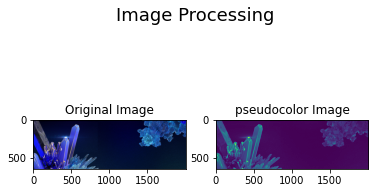

In [36]:
plt.suptitle('Image Processing', fontsize = 18)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(mpimg.imread('src.png'))

plt.subplot(122)
plt.title('pseudocolor Image')
dst_img = mpimg.imread('dst.png')
pseudo_img = dst_img[:,:,0]
plt.imshow(pseudo_img)
plt.show()